In [23]:
import pandas as pd
import matplotlib.pyplot as plt

rawData = pd.read_csv('data/data.scv', sep='\t')
rawData.time = pd.to_datetime(rawData.time)
rawData = rawData.set_index(rawData.time)
rawData = rawData.drop(['time','wDir.50','wDir.850hpa'],axis=1)
rawData.head()

,psfc,msl,wSpeed.50,wSpeed.850hpa,temperature.10,temperature.50,dispHeight,precIceWater,precLiqWater,precWaterVapor,specHumidity.10
time,,,,,,,,,,,
1990-01-01 00:00:00,100222.2,101272.5,11.27,18.02,-10.63,-11.43,0.1,0.0,1.3,6212.4,1.4
1990-01-01 01:00:00,100068.3,101118.8,11.65,19.68,-9.37,-10.21,0.1,0.0,0.3,6500.8,1.5
1990-01-01 02:00:00,99929.3,100975.7,12.53,20.97,-7.51,-8.43,0.1,0.0,0.0,5970.2,1.7
1990-01-01 03:00:00,99843.4,100890.6,12.16,21.43,-6.51,-7.41,0.1,0.1,0.0,5753.2,1.9
1990-01-01 04:00:00,99813.9,100869.8,11.81,20.91,-6.38,-7.23,0.1,0.9,6.1,6736.5,1.9


In [24]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.MinMaxScaler().fit(X=np.array(rawData))
DataScaler = scaler.transform(np.array(rawData))
df = pd.DataFrame(DataScaler, columns=rawData.columns)

df.head()

,psfc,msl,wSpeed.50,wSpeed.850hpa,temperature.10,temperature.50,dispHeight,precIceWater,precLiqWater,precWaterVapor,specHumidity.10
0,0.454060,0.453014,0.505623,0.444143,0.372378,0.377417,0.333333,0.000000,0.002249,0.117829,0.071429
1,0.436998,0.436171,0.522717,0.485080,0.388299,0.392538,0.333333,0.000000,0.000519,0.124063,0.076923
2,0.421589,0.420489,0.562303,0.516893,0.411802,0.414601,0.333333,0.000000,0.000000,0.112594,0.087912
3,0.412066,0.411163,0.545659,0.528237,0.424438,0.427243,0.333333,0.000194,0.000000,0.107903,0.098901
4,0.408796,0.408883,0.529915,0.515413,0.426080,0.429474,0.333333,0.001744,0.010552,0.129158,0.098901


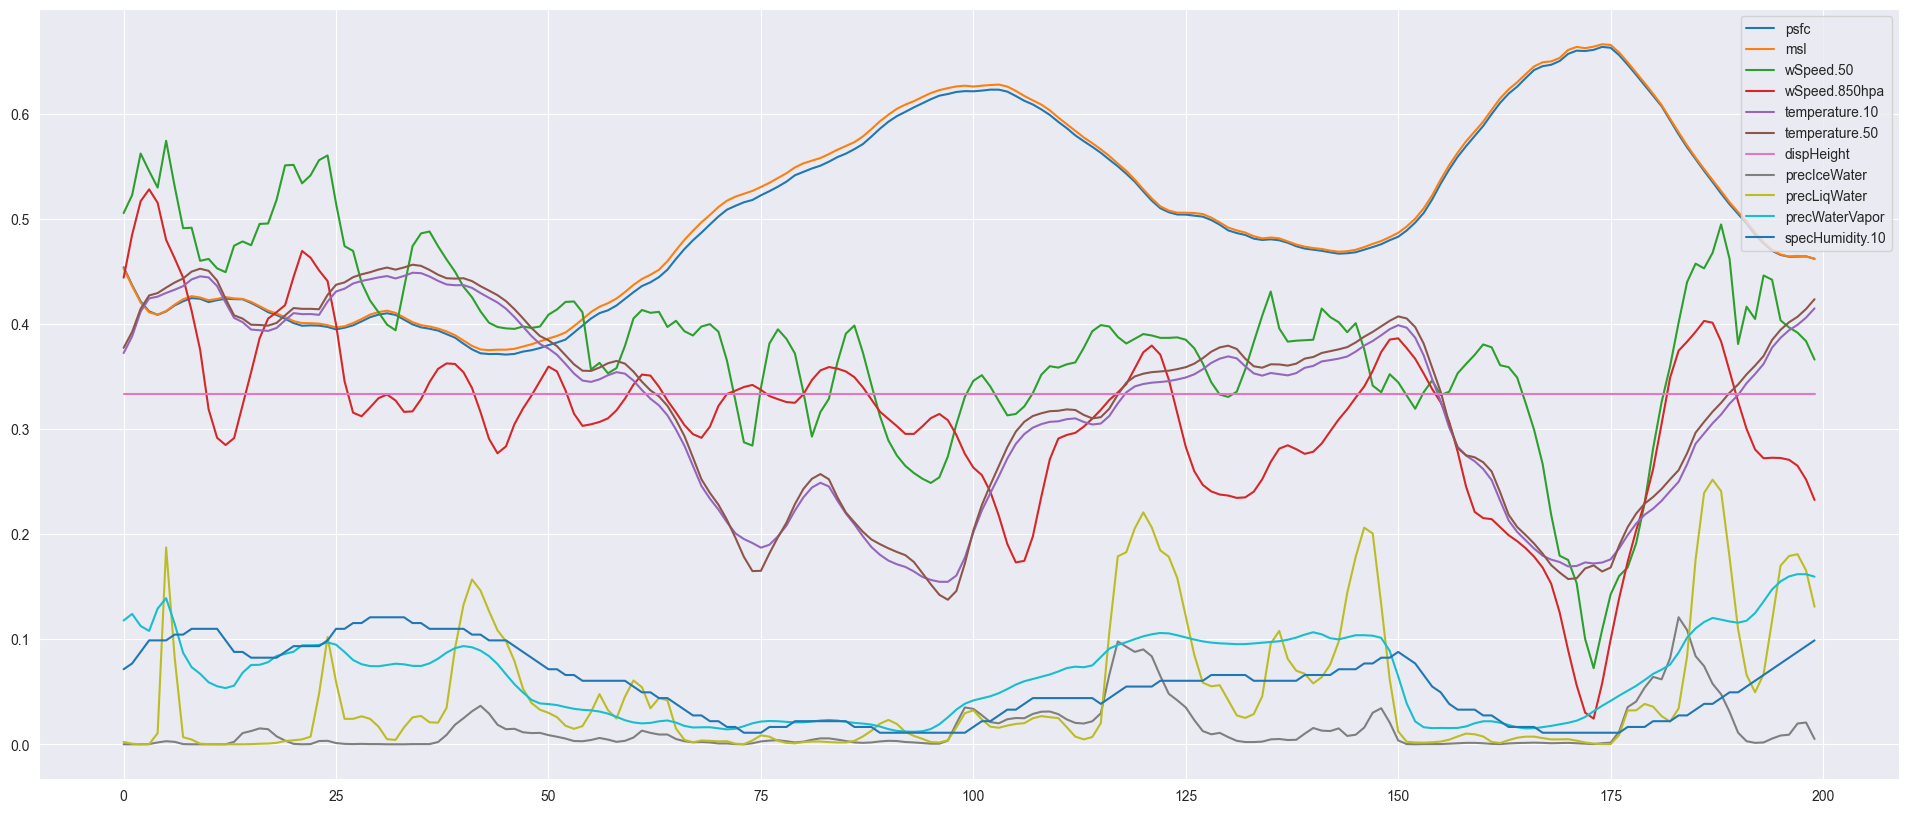

In [25]:
f, ax = plt.subplots()
f.set_size_inches(24,10)
DataLines = 200

for column in df.columns:
    ax.plot(df[column][:DataLines:], label = column)
ax.legend()

In [27]:
corr = np.corrcoef(rawData['temperature.10'].values, rawData['specHumidity.10'].values)[0,1]
corr

0.9062583857170985

pandas.core.frame.DataFrame